# **Character Interaction Graph**

# Suraj R Gautham

Importing required libraries

In [51]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import pandas as pd
import seaborn as sns
import community
from networkx.algorithms.community.centrality import girvan_newman
from operator import itemgetter
from networkx.algorithms.community import k_clique_communities  
import collections
from networkx.generators.random_graphs import *
#import pygraphviz

Downloading the Project Gutenberg and Stopwords corpus provided by NLTK

In [52]:
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Error loading gutenberg: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [53]:
# moby_dick = gutenberg.raw('melville-moby_dick.txt')
file = open('/kaggle/input/harry-potter-six/harry-potter-six.txt','r')
moby_dick = file.read()
#moby_dick

List out the characters in the book

Here, the list of characters is taken from the [Sparknotes](https://www.sparknotes.com/lit/mobydick/characters/) page. The adjacency matrix is created based on the co-occurrence of these characters in the same sentence.

# **1.a**

In [54]:
characters = ['Harry','Snape','Dumbledore','Voldemort', 'Hermione', 'Ron', 'Draco', 'Slughorn', 'Ginny','Rufus','McGonagall', 'Bellatrix', 'Luna', 'Hagrid','Umbridge','Neville', 'Lupin']

In [55]:
print(len(characters))

17


In [56]:
moby_dick = moby_dick.replace('Mr. potter', 'Harry')
moby_dick = moby_dick.replace('Ms. Granger', 'Hermione')
moby_dick = moby_dick.replace('Severus Snape', 'Snape')
moby_dick = moby_dick.replace('Albus Dumbledore', 'Dumbledore')
moby_dick = moby_dick.replace('Draco Malfoy', 'Draco')
moby_dick = moby_dick.replace('Dolores Umbridge', 'Umbridge')
moby_dick = moby_dick.replace('Remus', 'Lupin')
sentences = sent_tokenize(moby_dick)
print(len(sentences))

13733


The number of chapters in the book = 135 + 1 (epilogue)
All the chapter titles are removed while preprocessing

In [57]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') or "Epilogue" in sent or "CHAPTER 42" in sent:
        sentences.remove(sent)
        count+=1
    elif 'Contents' in sent:
        sentences.remove(sent)
    elif 'HARRY-POTTER' in sent:
        sentence.remove(sent)

print(len(sentences))

13733


Once the text is preprocessed, it is converted into an adjacency matrix, stored as a pandas DataFrame

In [58]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Harry,Snape,Dumbledore,Voldemort,Hermione,Ron,Draco,Slughorn,Ginny,Rufus,McGonagall,Bellatrix,Luna,Hagrid,Umbridge,Neville,Lupin
Harry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Snape,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dumbledore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Voldemort,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hermione,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

,Harry,Snape,Dumbledore,Voldemort,Hermione,Ron,Draco,Slughorn,Ginny,Rufus,McGonagall,Bellatrix,Luna,Hagrid,Umbridge,Neville,Lupin
Harry,0,206,610,82,426,554,28,250,162,8,42,4,28,114,6,50,32
Snape,206,0,74,22,30,28,14,16,4,2,10,14,6,14,0,2,8
Dumbledore,610,74,0,52,22,20,16,54,10,2,10,4,0,22,6,0,0
Voldemort,82,22,52,0,8,6,0,10,2,2,0,0,0,0,0,4,0
Hermione,426,30,22,8,0,462,4,32,82,2,14,0,6,36,2,8,6


Creating a NetworkX graph from the adjacency matrix

In [60]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

# for i in range(len(characters)):
#     for j in range(i+1, len(characters)):
#         char1 = characters[i]
#         char2 = characters[j]
#         if G.has_edge(char1, char2):
#             G[char1][char2]['interactions'] = char_df[char1][char2]

Printing nodes and edges in graph

In [61]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 17
Nodes: ['Harry', 'Snape', 'Dumbledore', 'Voldemort', 'Hermione', 'Ron', 'Draco', 'Slughorn', 'Ginny', 'Rufus', 'McGonagall', 'Bellatrix', 'Luna', 'Hagrid', 'Umbridge', 'Neville', 'Lupin']

Number of edges in the graph: 90
Edges: [('Harry', 'Snape', {'weight': 206}), ('Harry', 'Dumbledore', {'weight': 610}), ('Harry', 'Voldemort', {'weight': 82}), ('Harry', 'Hermione', {'weight': 426}), ('Harry', 'Ron', {'weight': 554}), ('Harry', 'Draco', {'weight': 28}), ('Harry', 'Slughorn', {'weight': 250}), ('Harry', 'Ginny', {'weight': 162}), ('Harry', 'Rufus', {'weight': 8}), ('Harry', 'McGonagall', {'weight': 42}), ('Harry', 'Bellatrix', {'weight': 4}), ('Harry', 'Luna', {'weight': 28}), ('Harry', 'Hagrid', {'weight': 114}), ('Harry', 'Umbridge', {'weight': 6}), ('Harry', 'Neville', {'weight': 50}), ('Harry', 'Lupin', {'weight': 32}), ('Snape', 'Dumbledore', {'weight': 74}), ('Snape', 'Voldemort', {'weight': 22}), ('Snape', 'Hermione', {'weight': 30}), ('Snape', 

Plotting the graph

# **1.b**

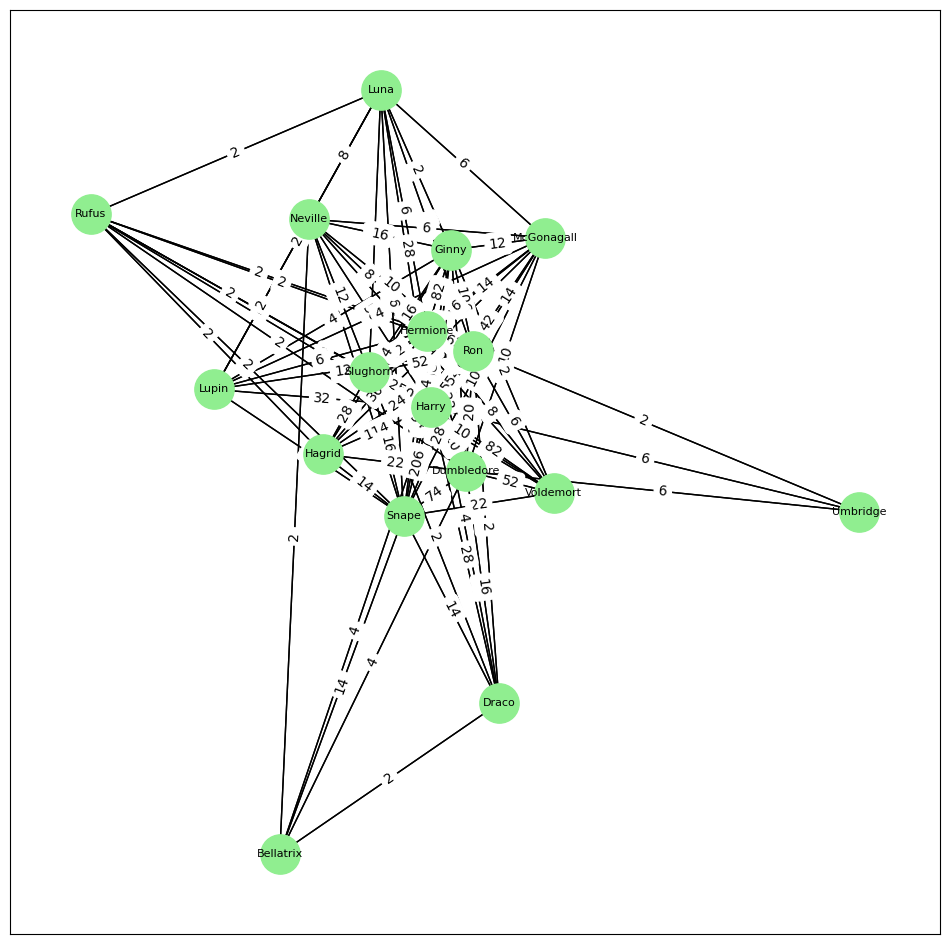

In [62]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [63]:
from operator import itemgetter

In [64]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Harry', 1.0),
 ('Snape', 0.9375),
 ('Hermione', 0.9375),
 ('Ron', 0.875),
 ('Dumbledore', 0.8125),
 ('Slughorn', 0.8125),
 ('Ginny', 0.75),
 ('McGonagall', 0.6875),
 ('Neville', 0.6875),
 ('Luna', 0.625),
 ('Voldemort', 0.5625),
 ('Rufus', 0.5625),
 ('Hagrid', 0.5625),
 ('Lupin', 0.5),
 ('Draco', 0.4375),
 ('Bellatrix', 0.3125),
 ('Umbridge', 0.1875)]

In [65]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Harry', 0.09346891534391533),
 ('Hermione', 0.06694113756613757),
 ('Dumbledore', 0.05696759259259259),
 ('Snape', 0.051802248677248676),
 ('Ron', 0.029441137566137563),
 ('Neville', 0.021319444444444443),
 ('Slughorn', 0.02048280423280423),
 ('Ginny', 0.012533068783068783),
 ('McGonagall', 0.008019179894179895),
 ('Luna', 0.005866402116402116),
 ('Draco', 0.005000000000000001),
 ('Rufus', 0.004166666666666667),
 ('Voldemort', 0.003042328042328042),
 ('Bellatrix', 0.0023148148148148147),
 ('Hagrid', 0.0019675925925925924),
 ('Umbridge', 0.0),
 ('Lupin', 0.0)]

In [66]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('Harry', 1.0),
 ('Snape', 0.9411764705882353),
 ('Hermione', 0.9411764705882353),
 ('Ron', 0.8888888888888888),
 ('Dumbledore', 0.8421052631578947),
 ('Slughorn', 0.8421052631578947),
 ('Ginny', 0.8),
 ('McGonagall', 0.7619047619047619),
 ('Neville', 0.7619047619047619),
 ('Luna', 0.7272727272727273),
 ('Voldemort', 0.6956521739130435),
 ('Rufus', 0.6956521739130435),
 ('Hagrid', 0.6956521739130435),
 ('Lupin', 0.6666666666666666),
 ('Draco', 0.64),
 ('Bellatrix', 0.5925925925925926),
 ('Umbridge', 0.5517241379310345)]

In [67]:

s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:

[('Harry', 0.28383255218839276), ('Ron', 0.133996064998798), ('Hermione', 0.11966663027053666), ('Dumbledore', 0.10384256222149671), ('Snape', 0.06034399061421769), ('Slughorn', 0.05822457756675448), ('Ginny', 0.04972347818137659), ('Hagrid', 0.033988918718154966), ('Voldemort', 0.027921147565742252), ('McGonagall', 0.023223531515508374), ('Neville', 0.022301545049193253), ('Luna', 0.017349549158546595), ('Draco', 0.016094726223947753), ('Lupin', 0.016009772494040397), ('Bellatrix', 0.011899894024171794), ('Rufus', 0.011435623866461008), ('Umbridge', 0.010145435342660629)]


# # **1.c**

In [68]:

centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'page-rank': pgr,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,page-rank
Harry,1.0000,0.093469,1.000000,0.283833
Snape,0.9375,0.051802,0.941176,0.060344
Dumbledore,0.8125,0.056968,0.842105,0.103843
Voldemort,0.5625,0.003042,0.695652,0.027921
Hermione,0.9375,0.066941,0.941176,0.119667
Ron,0.8750,0.029441,0.888889,0.133996
Draco,0.4375,0.005000,0.640000,0.016095
Slughorn,0.8125,0.020483,0.842105,0.058225
Ginny,0.7500,0.012533,0.800000,0.049723
Rufus,0.5625,0.004167,0.695652,0.011436


# **1.d**

In [69]:

clustering = {
    'local':nx.clustering(G),
    'global':nx.average_clustering(G)
}
clust = pd.DataFrame(clustering)
clust

,local,global
Bellatrix,0.800000,0.819771
Draco,0.857143,0.819771
Dumbledore,0.653846,0.819771
Ginny,0.833333,0.819771
Hagrid,0.944444,0.819771
Harry,0.616667,0.819771
Hermione,0.666667,0.819771
Luna,0.888889,0.819771
Lupin,1.000000,0.819771
McGonagall,0.872727,0.819771


# **1.e**

# **(i)**

In [70]:

c = list(k_clique_communities(G, 4))
print(c)

[frozenset({'Lupin', 'Dumbledore', 'Hermione', 'Draco', 'Voldemort', 'Neville', 'Luna', 'McGonagall', 'Ron', 'Ginny', 'Hagrid', 'Rufus', 'Umbridge', 'Slughorn', 'Snape', 'Harry', 'Bellatrix'})]


# **(ii)**

In [71]:
part = community.community_louvain.best_partition(G)
print(part)

{'Harry': 0, 'Snape': 0, 'Dumbledore': 0, 'Voldemort': 0, 'Hermione': 2, 'Ron': 2, 'Draco': 0, 'Slughorn': 0, 'Ginny': 2, 'Rufus': 0, 'McGonagall': 1, 'Bellatrix': 0, 'Luna': 1, 'Hagrid': 0, 'Umbridge': 0, 'Neville': 1, 'Lupin': 1}


# **(iii)**

In [72]:

communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print(sorted(map(sorted, next_level_communities)))
print("-------------------------")
print("modularity: ", community.modularity(part, G))

[['Bellatrix'], ['Draco', 'Dumbledore', 'Ginny', 'Hagrid', 'Harry', 'Hermione', 'Luna', 'Lupin', 'McGonagall', 'Neville', 'Ron', 'Rufus', 'Slughorn', 'Snape', 'Voldemort'], ['Umbridge']]
-------------------------
modularity:  0.07781833961421547


# **1.f**

In [73]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  17
Edges:  90
Average degree:  5.294117647058823


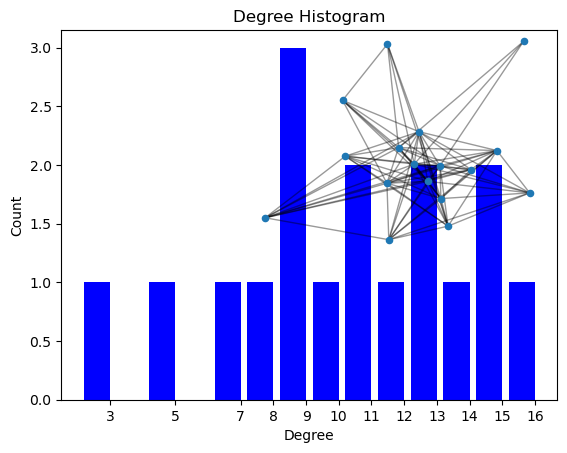

In [74]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

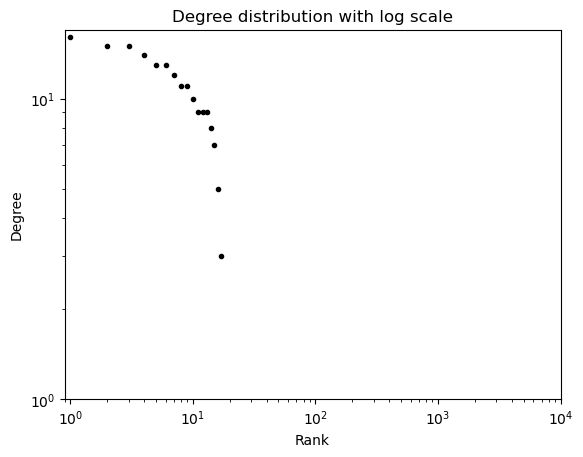

In [75]:
########################################################################
# Degree distribution 
########################################################################

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)
'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")
#degree distribution

In [76]:
print(nx.average_shortest_path_length(G))#Avg shortest path

1.338235294117647


In [77]:
largest_component = list(G.subgraph(c) for c in nx.connected_components(G))[0]
print(largest_component)#largest component

Graph with 17 nodes and 90 edges


# **(i)**

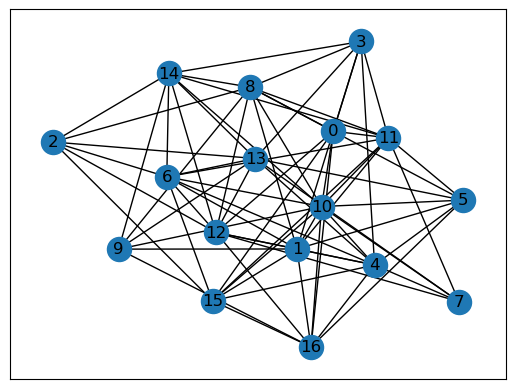

In [78]:
n = 17
p = 0.5
m = 16
D = erdos_renyi_graph(n,p)
nx.draw_networkx(D)

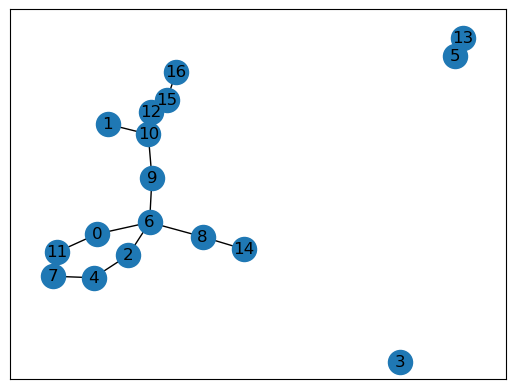

In [79]:
V = gnm_random_graph(n, m)
nx.draw_networkx(V)

# **(ii)**

In [80]:
preds = nx.preferential_attachment(G)
for u, v, p in preds:
    print(u,"-",v,"->",p)

McGonagall - Rufus -> 99
McGonagall - Umbridge -> 33
McGonagall - Draco -> 77
McGonagall - Bellatrix -> 55
McGonagall - Voldemort -> 99
Lupin - Dumbledore -> 104
Lupin - Hagrid -> 72
Lupin - Rufus -> 72
Lupin - Umbridge -> 24
Lupin - Slughorn -> 104
Lupin - Draco -> 56
Lupin - Bellatrix -> 40
Lupin - Voldemort -> 72
Dumbledore - Neville -> 143
Dumbledore - Luna -> 130
Bellatrix - Ron -> 70
Bellatrix - Ginny -> 60
Bellatrix - Hagrid -> 45
Bellatrix - Rufus -> 45
Bellatrix - Umbridge -> 15
Bellatrix - Hermione -> 75
Bellatrix - Slughorn -> 65
Bellatrix - Voldemort -> 45
Bellatrix - Luna -> 50
Ron - Umbridge -> 42
Ginny - Rufus -> 108
Ginny - Umbridge -> 36
Ginny - Draco -> 84
Hagrid - Umbridge -> 27
Hagrid - Draco -> 63
Hagrid - Voldemort -> 81
Hagrid - Neville -> 99
Hagrid - Luna -> 90
Rufus - Neville -> 99
Rufus - Umbridge -> 27
Rufus - Draco -> 63
Umbridge - Snape -> 45
Umbridge - Slughorn -> 39
Umbridge - Draco -> 21
Umbridge - Voldemort -> 27
Umbridge - Neville -> 33
Umbridge - Luna

# **(iii)**

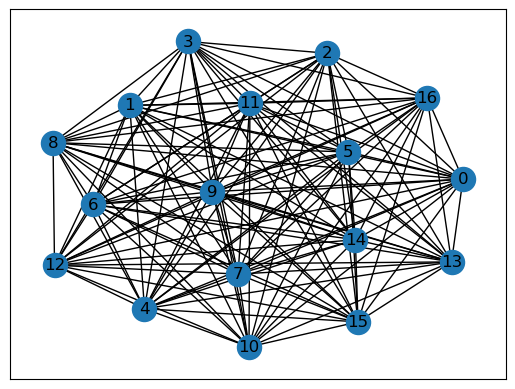

In [81]:
small_world = nx.newman_watts_strogatz_graph(n, m, p)
nx.draw_networkx(small_world)

# **2.a**

In [82]:
centrality

,degree,betweenness,closeness,page-rank
Harry,1.0000,0.093469,1.000000,0.283833
Snape,0.9375,0.051802,0.941176,0.060344
Dumbledore,0.8125,0.056968,0.842105,0.103843
Voldemort,0.5625,0.003042,0.695652,0.027921
Hermione,0.9375,0.066941,0.941176,0.119667
Ron,0.8750,0.029441,0.888889,0.133996
Draco,0.4375,0.005000,0.640000,0.016095
Slughorn,0.8125,0.020483,0.842105,0.058225
Ginny,0.7500,0.012533,0.800000,0.049723
Rufus,0.5625,0.004167,0.695652,0.011436


The page rank indicates the relevance of a specific character within this book.
A high page rank, ex:- Harry Potter: 0.283833, indicates that he is the most relevant amongst the chosen charecters in the book whereas a low pagerank, ex:- Rufus: 0.011436, depicts that his charecter is not as relevant.

High degree and closeness indicates that those nodes are associated to multiple nodes directly. Here, Harry, Snape, Dumbledore, Hermione, Ron and Slughorn have high degree and closenes and have high correlation, this indicates that these charecters are closly, or directly associated with all the chosen charecters.

Betweenness values here cannot be used directly to determine the importance of charecters as most of the chosen charecters within the list are directly associated.

When the 4 centralities are not closely related, it suggests that distinct nodes may be recognized as significant based on different centrality criteria. This indicates that there are various approaches to defining and evaluating significance within a network, emphasizing the need to examine multiple centrality measures to gain a more holistic understanding of the network's properties and behaviors. Generally, the meaning of centralities is influenced by the particular context and research objectives. Therefore, it's crucial to take into account the advantages and limitations of each centrality measure and select the most suitable ones based on the research goals.

# **2.b**

In [83]:
clust

,local,global
Bellatrix,0.800000,0.819771
Draco,0.857143,0.819771
Dumbledore,0.653846,0.819771
Ginny,0.833333,0.819771
Hagrid,0.944444,0.819771
Harry,0.616667,0.819771
Hermione,0.666667,0.819771
Luna,0.888889,0.819771
Lupin,1.000000,0.819771
McGonagall,0.872727,0.819771


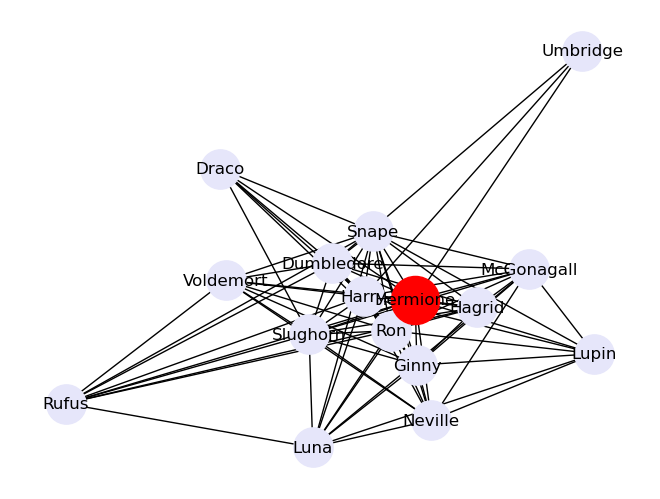

In [84]:
ego1 = 'Hermione'
options = {"node_size": 1200, "node_color": "r"}
# create ego network
hub_ego = nx.ego_graph(G, ego1,1)

# showing the ego network
nx.draw(hub_ego, pos, node_color="lavender",
		node_size = 800, with_labels = True)

nx.draw_networkx_nodes(
hub_ego, pos, nodelist = [ego1], **options)

plt.show()


In [85]:
print(sorted(map(sorted, next_level_communities)))

[['Bellatrix'], ['Draco', 'Dumbledore', 'Ginny', 'Hagrid', 'Harry', 'Hermione', 'Luna', 'Lupin', 'McGonagall', 'Neville', 'Ron', 'Rufus', 'Slughorn', 'Snape', 'Voldemort'], ['Umbridge']]


As observed, most of the charecters have high global clstering coefficient, this means that most of the charecter's neighbours are well connected with each other with a few exceptions. The local clustering coefficients of certain charecter like Harry, Hermione are low as it indicates that they are associated with certain charecters which are not locally connected to the same neighbourhood.

3 main communities were discovered. As observed, the first community consists only of Bellatrix, depicting that she is a lonely node. The next cluster consists of all the charecters who are within or associated with Hogwarts in the timeline. The last cluster consists of Umbridge, who's role is a government official in this book, hence she is placed in a seperate cluster.

The example ego network for Hermione shows that she is closly associated with harry and ron. Further she is also associated with Snape, Dumbledore, Voldemort, Ginny and Neville. She is not as associated with the other characters.
Therefore an ego network can be defined as a portion of a social network formed of a given individual, termed ego, and the other persons with whom she has a social relationship, termed alters.

The average shortest path of this network is: 1.338235294117647
It is a measure of the efficiency of information or mass transport on a network.
A small average shortest path value indicates that the information flow is highly dense and efficient.

The clustering coefficient of a node is related to transitivity in that a high clustering coefficient is a necessary condition for high transitivity. This is because in order for a graph to have high transitivity, many triangles must exist in the graph, and for triangles to exist, the nodes that form them must be highly connected to each other. Thus, nodes with high clustering coefficients are more likely to be involved in triangles, and hence the graph as a whole is more likely to have high transitivity.



# **2.c**

All the generated graphs have same number of nodes as our graph(17 nodes) as it makes the comparision substantial and easy.
The three centrality measures,i.e. Degree, Closeness and betweenness have been calculated for the three generated graphs as shown below. Later it is compared with the values of our graph. 

In [86]:
#centrality measures of erdos_renyi_graph
degcD = nx.degree_centrality(D)
sorted(degcD.items(), key=itemgetter(1), reverse=True)

betD = nx.betweenness_centrality(D)
sorted(betD.items(), key=itemgetter(1), reverse=True)

closD = nx.closeness_centrality(D)
sorted(closD.items(), key=itemgetter(1), reverse=True)

centrality_measures = {
    'degree': degcD,
    'betweenness': betD,
    'closeness': closD
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness
0,0.4375,0.016181,0.640000
1,0.6875,0.044871,0.761905
2,0.3750,0.010694,0.615385
3,0.4375,0.018849,0.640000
4,0.6250,0.041875,0.727273
5,0.4375,0.013829,0.640000
6,0.5625,0.025506,0.695652
7,0.3125,0.006677,0.592593
8,0.6250,0.045784,0.727273
9,0.3750,0.011607,0.615385


In [87]:
#centrality measures of newman_watts_strogatz_graph
degcsw = nx.degree_centrality(small_world)
sorted(degcsw.items(), key=itemgetter(1), reverse=True)

betsw = nx.betweenness_centrality(small_world)
sorted(betsw.items(), key=itemgetter(1), reverse=True)

clossw = nx.closeness_centrality(small_world)
sorted(clossw.items(), key=itemgetter(1), reverse=True)

centrality_measures = {
    'degree': degcsw,
    'betweenness': betsw,
    'closeness': clossw
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
5,1.0,0.0,1.0
6,1.0,0.0,1.0
7,1.0,0.0,1.0
8,1.0,0.0,1.0
9,1.0,0.0,1.0


In [88]:
#centrality measures of gnm_random_graph
degcV = nx.degree_centrality(V)
sorted(degcV.items(), key=itemgetter(1), reverse=True)

betV = nx.betweenness_centrality(V)
sorted(betV.items(), key=itemgetter(1), reverse=True)

closV = nx.closeness_centrality(V)
sorted(closD.items(), key=itemgetter(1), reverse=True)

centrality_measures = {
    'degree': degcV,
    'betweenness': betV,
    'closeness': closV
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness
0,0.1250,0.116667,0.293403
1,0.0625,0.000000,0.229620
2,0.1250,0.116667,0.293403
3,0.0000,0.000000,0.000000
4,0.1250,0.050000,0.240057
5,0.0625,0.000000,0.062500
6,0.2500,0.450000,0.377232
7,0.1250,0.016667,0.203125
8,0.1250,0.100000,0.277961
9,0.1250,0.333333,0.352083


In [89]:
#centrality measures of our graph
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness
Harry,1.0000,0.093469,1.000000
Snape,0.9375,0.051802,0.941176
Dumbledore,0.8125,0.056968,0.842105
Voldemort,0.5625,0.003042,0.695652
Hermione,0.9375,0.066941,0.941176
Ron,0.8750,0.029441,0.888889
Draco,0.4375,0.005000,0.640000
Slughorn,0.8125,0.020483,0.842105
Ginny,0.7500,0.012533,0.800000
Rufus,0.5625,0.004167,0.695652


As observed from the comparision,

-> The degree centrality of each node of our graph is a lot more than that of those of erdos_renyi_graph and gnm, this shows that the nodes within our graph are largly connected to each other. On the contrary, a small world graph has degree 1 for all nodes showing that all the nodes have equal degree and are connected with one another.

->The betweenness centrality comparision shows that most nodes in our graph are directly connected and hence have low betweenness, similar to that of erdos_renyi_graph, whereas some nodes in gnm_random_graph have high betweenness values indicating the presence of structural holes. The small world graph has zero betweenness for all nodes as they are all directly connected.

->The closeness centrality of the nodes in our graph has a reasonably high value indicating efficient flow of information with short path lenghts. The closeness values for gnm_random_graph are low, some even zero, indicating ineffecient flow of information. Erdos_renyi_graph has moderate values for closeness, this indicates that some nodes carry information better than some others. The closeness for the small world graph is 1, indicating the most efficient flow of information, this is easily understood as information flow is fastest when every node is connected to every other node.


# **2.d**

Gephi Representation

In [90]:
nx.write_gexf(G, "NAM.gexf")



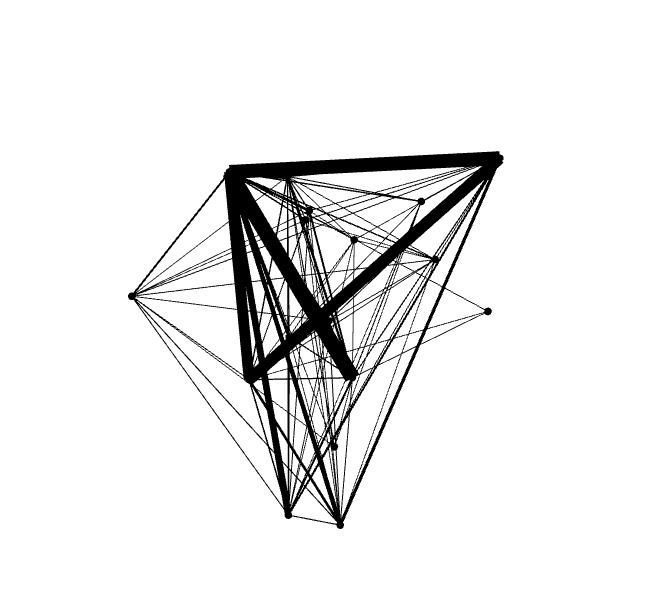